# SVM

Kernels: Linear, RBF, Sigmoid, Polynomial

Input datasets:

- Min-Max Normalized
- Z-Score Standardized


## Business Logic Implementation


In [81]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score as acc,
    classification_report as report,
    confusion_matrix as cm,
)
import matplotlib.pyplot as plt

# Define devices
DEVICES = ["empatica", "samsung"]

# Define algorithm
ALGORITHM = SVC
ALGORITHM_NAME = "SVM"

# Define Configuration
RAND_STATE = 11


# Train and evaluate the model's performance using the accuracy_score and the classification_report sklearn-provided
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, device_name):
    # Guidance for reshaping target variables to 1d arrays, provided by ChatGPT
    # Specific implementation details were adapted for the purposes of this project.
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = acc(y_test, y_pred)

    # Display accuracy
    print(f"{device_name.capitalize()} Model Accuracy:", accuracy)

    # Classification report
    print(
        f"\nClassification Report ({device_name.capitalize()} Model):\n",
        report(y_test, y_pred, zero_division=1),  # Set zero_division parameter
    )

    return y_pred


def visualize_confusion_matrices(conf_mat_empatica, conf_mat_samsung, kernel, scaling):
    # Create a single figure for both confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Visualize the confusion matrix for Empatica model
    # Guidance for visualizing the CMs in one figure, provided by ChatGPT
    # Specific implementation details were adapted for the purposes of this project.
    axes[0].imshow(conf_mat_empatica, cmap="Blues")
    axes[0].set_title(
        f"{ALGORITHM_NAME} ({kernel}) - {scaling} - {DEVICES[0].capitalize()} Model"
    )
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    axes[0].set_xticks([0, 1])
    axes[0].set_yticks([0, 1])
    for i in range(conf_mat_empatica.shape[0]):
        for j in range(conf_mat_empatica.shape[1]):
            axes[0].text(
                j,
                i,
                str(conf_mat_empatica[i, j]),
                ha="center",
                va="center",
                color="black",
            )

    # Visualize the confusion matrix for Samsung model
    axes[1].imshow(conf_mat_samsung, cmap="Blues")
    axes[1].set_title(
        f"{ALGORITHM_NAME} ({kernel}) - {scaling} - {DEVICES[1].capitalize()} Model"
    )
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    axes[1].set_xticks([0, 1])
    axes[1].set_yticks([0, 1])
    for i in range(conf_mat_samsung.shape[0]):
        for j in range(conf_mat_samsung.shape[1]):
            axes[1].text(
                j,
                i,
                str(conf_mat_samsung[i, j]),
                ha="center",
                va="center",
                color="black",
            )

    plt.tight_layout()
    plt.show()


def train_svm_model_and_visualize_results(
    kernel, scaling, training_file_path, testing_file_path
):
    # Define feature and label sets
    empatica_feature = [f"{DEVICES[0]}_bvp", f"{DEVICES[0]}_eda", f"{DEVICES[0]}_temp"]
    samsung_feature = [f"{DEVICES[1]}_bvp"]
    label = ["CL"]

    # Load the dataset
    training_df = pd.read_csv(training_file_path)
    testing_df = pd.read_csv(testing_file_path)

    # Split the dataset into features (X) and target variable (y)
    X_train_empatica = training_df[empatica_feature]
    y_train_empatica = training_df[label]

    X_train_samsung = training_df[samsung_feature]
    y_train_samsung = training_df[label]

    X_test_empatica = testing_df[empatica_feature]
    y_test_empatica = testing_df[label]

    X_test_samsung = testing_df[samsung_feature]
    y_test_samsung = testing_df[label]

    # Define models
    model_empatica = ALGORITHM(kernel=kernel, random_state=RAND_STATE)
    model_samsung = ALGORITHM(kernel=kernel, random_state=RAND_STATE)

    # Train and evaluate the models
    y_pred_empatica = train_and_evaluate_model(
        model_empatica,
        X_train_empatica,
        y_train_empatica,
        X_test_empatica,
        y_test_empatica,
        DEVICES[0],
    )
    y_pred_samsung = train_and_evaluate_model(
        model_samsung,
        X_train_samsung,
        y_train_samsung,
        X_test_samsung,
        y_test_samsung,
        DEVICES[1],
    )

    # Confusion matrix for both models
    conf_mat_empatica = cm(y_test_empatica, y_pred_empatica)
    conf_mat_samsung = cm(y_test_samsung, y_pred_samsung)

    # Visualize the CMs
    visualize_confusion_matrices(conf_mat_empatica, conf_mat_samsung, kernel, scaling)

## RBF Kernel


Empatica Model Accuracy: 0.40641711229946526

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.33      0.18      0.23       374
           1       0.44      0.63      0.52       374

    accuracy                           0.41       748
   macro avg       0.38      0.41      0.37       748
weighted avg       0.38      0.41      0.37       748

Samsung Model Accuracy: 0.5347593582887701

Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       1.00      0.07      0.13       374
           1       0.52      1.00      0.68       374

    accuracy                           0.53       748
   macro avg       0.76      0.53      0.41       748
weighted avg       0.76      0.53      0.41       748



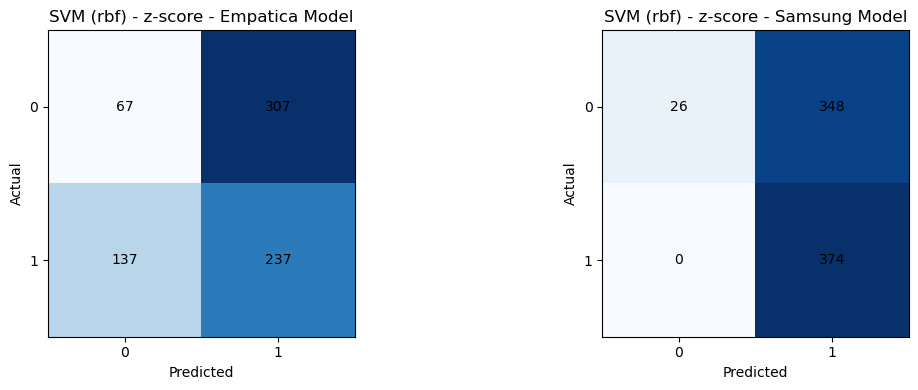

In [82]:
if __name__ == "__main__":
    # Define dataset scaling
    SCALING = "z-score"

    # Define configuration
    KERNEL = "rbf"

    # Define file paths
    TRAINING_FILE_PATH = f"./data/6-data-split/{SCALING}/a_training.csv"
    TESTING_FILE_PATH = f"./data/6-data-split/{SCALING}/b_testing.csv"

    # Train, display performance reports, and visualize the Confusion Matrix
    train_svm_model_and_visualize_results(
        KERNEL, SCALING, TRAINING_FILE_PATH, TESTING_FILE_PATH
    )

Empatica Model Accuracy: 0.39438502673796794

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.31      0.18      0.23       374
           1       0.43      0.61      0.50       374

    accuracy                           0.39       748
   macro avg       0.37      0.39      0.36       748
weighted avg       0.37      0.39      0.36       748

Samsung Model Accuracy: 0.5347593582887701

Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       1.00      0.07      0.13       374
           1       0.52      1.00      0.68       374

    accuracy                           0.53       748
   macro avg       0.76      0.53      0.41       748
weighted avg       0.76      0.53      0.41       748



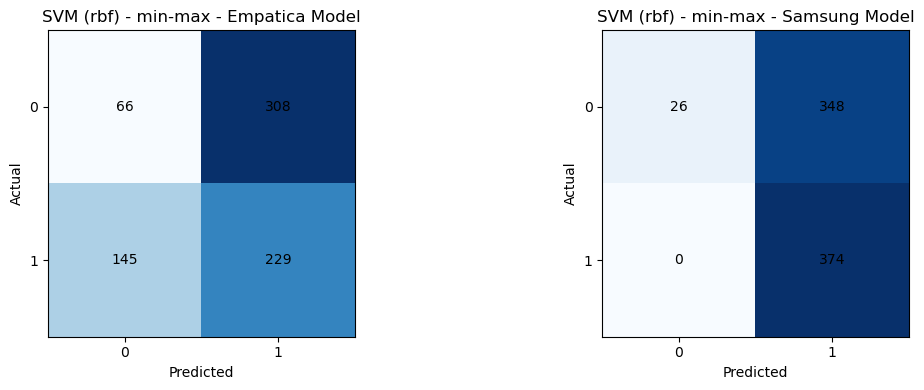

In [83]:
if __name__ == "__main__":
    # Define dataset scaling
    SCALING = "min-max"

    # Define configuration
    KERNEL = "rbf"

    # Define file paths
    TRAINING_FILE_PATH = f"./data/6-data-split/{SCALING}/a_training.csv"
    TESTING_FILE_PATH = f"./data/6-data-split/{SCALING}/b_testing.csv"

    # Train, display performance reports, and visualize the Confusion Matrix
    train_svm_model_and_visualize_results(
        KERNEL, SCALING, TRAINING_FILE_PATH, TESTING_FILE_PATH
    )

## Linear Kernel


Empatica Model Accuracy: 0.5

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       374
           1       0.50      1.00      0.67       374

    accuracy                           0.50       748
   macro avg       0.75      0.50      0.33       748
weighted avg       0.75      0.50      0.33       748

Samsung Model Accuracy: 0.5

Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       374
           1       0.50      1.00      0.67       374

    accuracy                           0.50       748
   macro avg       0.75      0.50      0.33       748
weighted avg       0.75      0.50      0.33       748



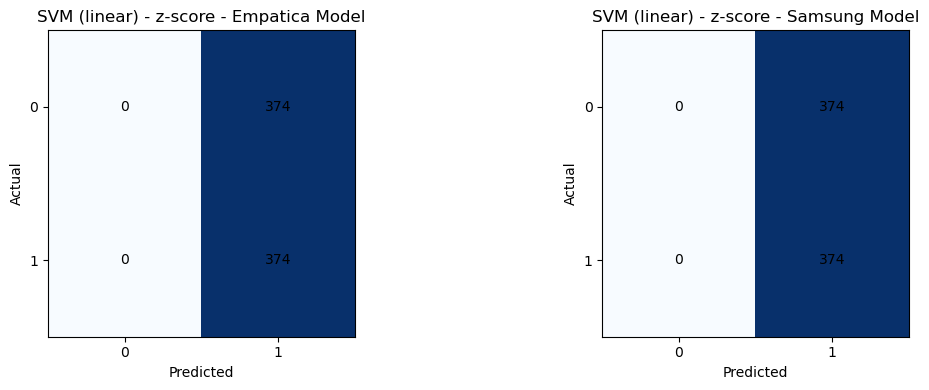

In [84]:
if __name__ == "__main__":
    # Define dataset scaling
    SCALING = "z-score"

    # Define configuration
    KERNEL = "linear"

    # Define file paths
    TRAINING_FILE_PATH = f"./data/6-data-split/{SCALING}/a_training.csv"
    TESTING_FILE_PATH = f"./data/6-data-split/{SCALING}/b_testing.csv"

    # Train, display performance reports, and visualize the Confusion Matrix
    train_svm_model_and_visualize_results(
        KERNEL, SCALING, TRAINING_FILE_PATH, TESTING_FILE_PATH
    )

Empatica Model Accuracy: 0.5

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       374
           1       0.50      1.00      0.67       374

    accuracy                           0.50       748
   macro avg       0.75      0.50      0.33       748
weighted avg       0.75      0.50      0.33       748

Samsung Model Accuracy: 0.5

Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       374
           1       0.50      1.00      0.67       374

    accuracy                           0.50       748
   macro avg       0.75      0.50      0.33       748
weighted avg       0.75      0.50      0.33       748



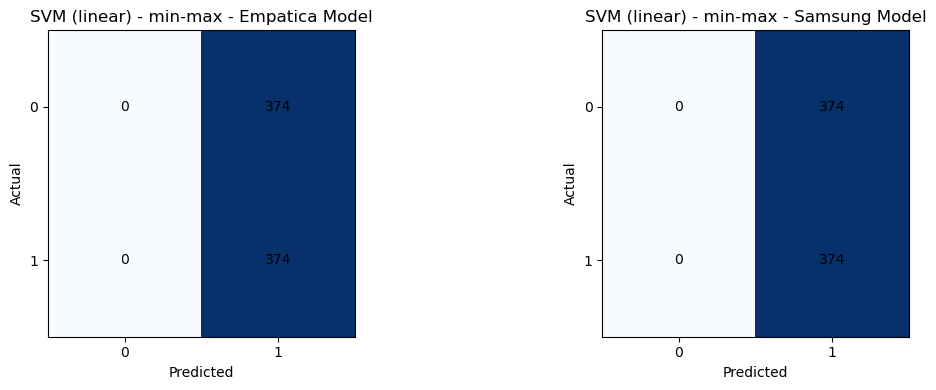

In [85]:
if __name__ == "__main__":
    # Define dataset scaling
    SCALING = "min-max"

    # Define configuration
    KERNEL = "linear"

    # Define file paths
    TRAINING_FILE_PATH = f"./data/6-data-split/{SCALING}/a_training.csv"
    TESTING_FILE_PATH = f"./data/6-data-split/{SCALING}/b_testing.csv"

    # Train, display performance reports, and visualize the Confusion Matrix
    train_svm_model_and_visualize_results(
        KERNEL, SCALING, TRAINING_FILE_PATH, TESTING_FILE_PATH
    )

## Polynomial Kernel


Empatica Model Accuracy: 0.42245989304812837

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.36      0.20      0.26       374
           1       0.45      0.64      0.53       374

    accuracy                           0.42       748
   macro avg       0.40      0.42      0.39       748
weighted avg       0.40      0.42      0.39       748

Samsung Model Accuracy: 0.5

Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       374
           1       0.50      1.00      0.67       374

    accuracy                           0.50       748
   macro avg       0.75      0.50      0.33       748
weighted avg       0.75      0.50      0.33       748



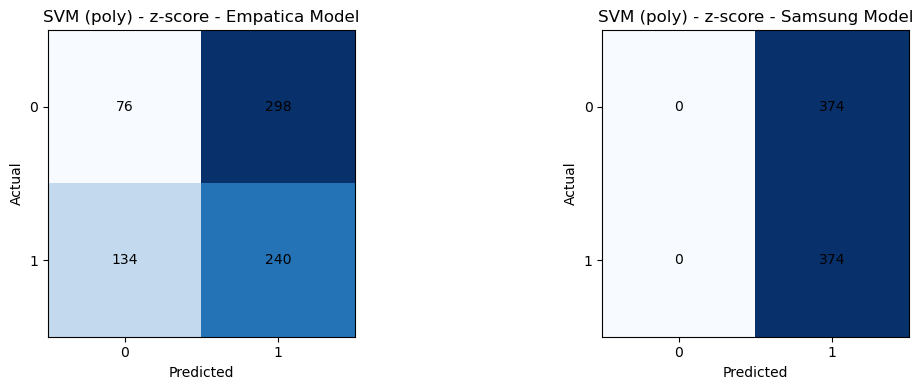

In [86]:
if __name__ == "__main__":
    # Define dataset scaling
    SCALING = "z-score"

    # Define configuration
    KERNEL = "poly"

    # Define file paths
    TRAINING_FILE_PATH = f"./data/6-data-split/{SCALING}/a_training.csv"
    TESTING_FILE_PATH = f"./data/6-data-split/{SCALING}/b_testing.csv"

    # Train, display performance reports, and visualize the Confusion Matrix
    train_svm_model_and_visualize_results(
        KERNEL, SCALING, TRAINING_FILE_PATH, TESTING_FILE_PATH
    )

Empatica Model Accuracy: 0.4344919786096257

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.39      0.23      0.29       374
           1       0.45      0.64      0.53       374

    accuracy                           0.43       748
   macro avg       0.42      0.43      0.41       748
weighted avg       0.42      0.43      0.41       748

Samsung Model Accuracy: 0.5

Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       374
           1       0.50      1.00      0.67       374

    accuracy                           0.50       748
   macro avg       0.75      0.50      0.33       748
weighted avg       0.75      0.50      0.33       748



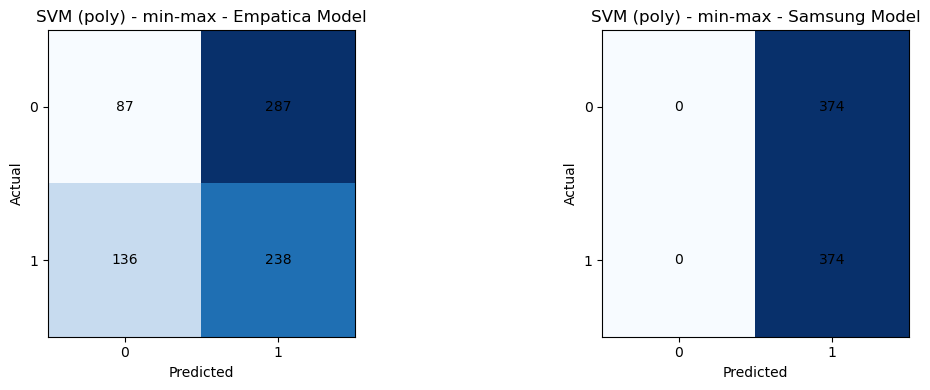

In [87]:
if __name__ == "__main__":
    # Define dataset scaling
    SCALING = "min-max"

    # Define configuration
    KERNEL = "poly"

    # Define file paths
    TRAINING_FILE_PATH = f"./data/6-data-split/{SCALING}/a_training.csv"
    TESTING_FILE_PATH = f"./data/6-data-split/{SCALING}/b_testing.csv"

    # Train, display performance reports, and visualize the Confusion Matrix
    train_svm_model_and_visualize_results(
        KERNEL, SCALING, TRAINING_FILE_PATH, TESTING_FILE_PATH
    )

## Sigmoid Kernel


Empatica Model Accuracy: 0.4732620320855615

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.05      0.00      0.01       374
           1       0.49      0.94      0.64       374

    accuracy                           0.47       748
   macro avg       0.27      0.47      0.32       748
weighted avg       0.27      0.47      0.32       748

Samsung Model Accuracy: 0.4946524064171123

Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       0.50      0.99      0.66       374
           1       0.00      0.00      1.00       374

    accuracy                           0.49       748
   macro avg       0.25      0.49      0.83       748
weighted avg       0.25      0.49      0.83       748



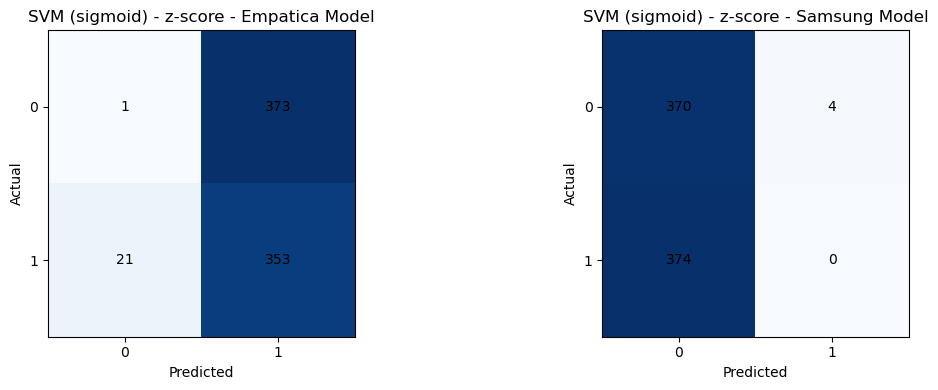

In [88]:
if __name__ == "__main__":
    # Define dataset scaling
    SCALING = "z-score"

    # Define configuration
    KERNEL = "sigmoid"

    # Define file paths
    TRAINING_FILE_PATH = f"./data/6-data-split/{SCALING}/a_training.csv"
    TESTING_FILE_PATH = f"./data/6-data-split/{SCALING}/b_testing.csv"

    # Train, display performance reports, and visualize the Confusion Matrix
    train_svm_model_and_visualize_results(
        KERNEL, SCALING, TRAINING_FILE_PATH, TESTING_FILE_PATH
    )

Empatica Model Accuracy: 0.47459893048128343

Classification Report (Empatica Model):
               precision    recall  f1-score   support

           0       0.46      0.26      0.34       374
           1       0.48      0.68      0.57       374

    accuracy                           0.47       748
   macro avg       0.47      0.47      0.45       748
weighted avg       0.47      0.47      0.45       748

Samsung Model Accuracy: 0.9906417112299465

Classification Report (Samsung Model):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       374
           1       0.98      1.00      0.99       374

    accuracy                           0.99       748
   macro avg       0.99      0.99      0.99       748
weighted avg       0.99      0.99      0.99       748



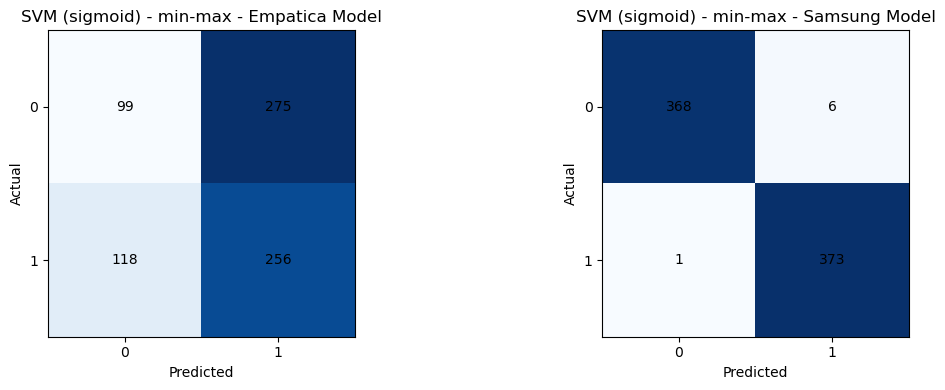

In [89]:
if __name__ == "__main__":
    # Define dataset scaling
    SCALING = "min-max"

    # Define configuration
    KERNEL = "sigmoid"

    # Define file paths
    TRAINING_FILE_PATH = f"./data/6-data-split/{SCALING}/a_training.csv"
    TESTING_FILE_PATH = f"./data/6-data-split/{SCALING}/b_testing.csv"

    # Train, display performance reports, and visualize the Confusion Matrix
    train_svm_model_and_visualize_results(
        KERNEL, SCALING, TRAINING_FILE_PATH, TESTING_FILE_PATH
    )